In [2]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

labels = ["NORMAL", "PNEUMONIA"]
def load_images_from_folder(folder):
    images = []
    for label in labels:
        paths = os.path.join(folder, label)
        cat = labels.index(label)
        for img in os.listdir(paths)[:1300]:
            data = cv2.imread(os.path.join(paths,img))
            gry_data = cv2.cvtColor(data, cv2.COLOR_BGR2GRAY)
            re_data = cv2.resize(gry_data,(150,150))
            if data is not None:
                images.append([re_data, cat])
    return images

In [3]:
path = r"C:\Users\sbsro\Documents\ML_Projects\Pneumonia Detection Project\chest_xray"
os.chdir(path)

In [4]:
train = load_images_from_folder('train')

In [5]:
test = load_images_from_folder('test')

In [6]:
val = load_images_from_folder('val')

Text(0.5, 1.0, 'NORMAL')

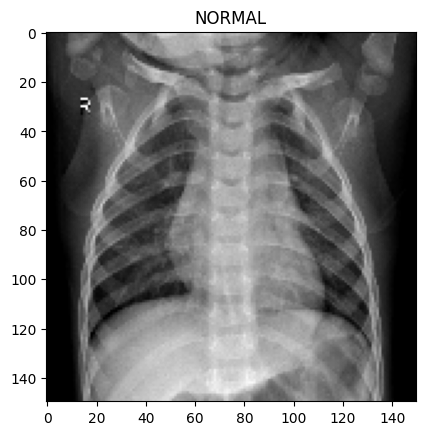

In [7]:
plt.imshow(train[1][0], cmap = 'gray')
plt.title(labels[train[1][1]])

Text(0.5, 1.0, 'PNEUMONIA')

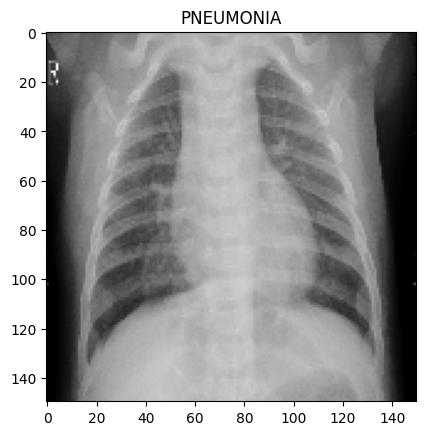

In [8]:
plt.imshow(train[1301][0], cmap='gray')
plt.title(labels[train[1301][1]])

In [9]:
X_train = []
y_train = []

for img, label in train:
    X_train.append(img)
    y_train.append(label)

X_train = np.array(X_train)

In [10]:
X_test = []
y_test = []

for img, label in test:
    X_test.append(img)
    y_test.append(label)

X_test = np.array(X_test)

In [11]:
X_val = []
y_val = []

for img, label in val:
    X_val.append(img)
    y_val.append(label)
    
X_val = np.array(X_val)

In [12]:
## Normalize
X_train = X_train/255.0
X_test = X_test/255.0
X_val = X_val/255.0

### Model Training

In [13]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization

In [14]:
X_val = X_val.reshape(-1, 150, 150, 1)
X_train = X_train.reshape(-1,150,150,1)
X_test = X_test.reshape(-1, 150, 150, 1)

In [15]:
y_train = np.array(y_train)
y_test = np.array(y_test)
y_val = np.array(y_val)

In [86]:
model = keras.models.Sequential([
keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation= 'relu', input_shape = (150,150,1)),
keras.layers.MaxPool2D(pool_size=(2,2)),
keras.layers.Dropout(.1),
    
keras.layers.Conv2D(filters= 64, kernel_size = (3,3), activation= 'relu'),
keras.layers.MaxPool2D(pool_size=(2,2)),
keras.layers.Dropout(.2),

keras.layers.Conv2D(filters= 96, kernel_size = (3,3), activation= 'relu'),
keras.layers.MaxPool2D(pool_size=(2,2)),
keras.layers.Dropout(.3),
keras.layers.Flatten(),
keras.layers.Dense(512, activation='relu'),
keras.layers.Dense(1, activation= 'sigmoid')
]
)
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_43 (Conv2D)          (None, 148, 148, 32)      320       
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 dropout_17 (Dropout)        (None, 74, 74, 32)        0         
                                                                 
 conv2d_44 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 36, 36, 64)       

In [87]:
model.compile(loss="binary_crossentropy",
 optimizer="rmsprop",
 metrics=["accuracy"])

In [88]:
history = model.fit(X_train, y_train, epochs=5,
... validation_data=(X_val, y_val))

Epoch 1/5
82/82 [==============================] - 31s 373ms/step - loss: 0.7957 - accuracy: 0.6154 - val_loss: 0.5948 - val_accuracy: 0.7500
Epoch 2/5
82/82 [==============================] - 30s 370ms/step - loss: 0.2804 - accuracy: 0.8950 - val_loss: 0.4841 - val_accuracy: 0.6875
Epoch 3/5
82/82 [==============================] - 30s 371ms/step - loss: 0.1754 - accuracy: 0.9308 - val_loss: 0.8681 - val_accuracy: 0.6250
Epoch 4/5
82/82 [==============================] - 31s 373ms/step - loss: 0.1280 - accuracy: 0.9519 - val_loss: 0.6377 - val_accuracy: 0.6875
Epoch 5/5
82/82 [==============================] - 30s 371ms/step - loss: 0.1182 - accuracy: 0.9565 - val_loss: 0.1670 - val_accuracy: 1.0000


In [50]:
from sklearn.metrics import accuracy_score, f1_score, recall_score

In [89]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

20/20 [==============================] - 1s 65ms/step


In [93]:
score = model.evaluate(X_test,y_test)[1]
print('Model Test Accuracy:', score*100, '%')

20/20 [==============================] - 1s 65ms/step - loss: 0.3826 - accuracy: 0.8542
Model Test Accuracy: 85.41666865348816 %


## Analysis

Text(0.5, 1.0, 'Training Values')

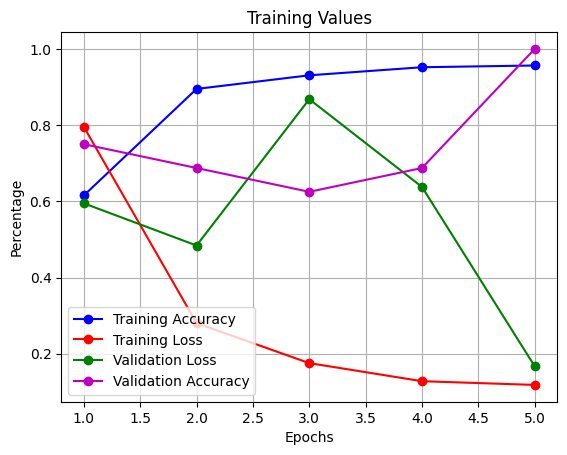

In [112]:
epochs = np.arange(5) + 1
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

plt.plot(epochs, train_acc, 'bo-')
plt.plot(epochs, train_loss, 'ro-')
plt.plot(epochs, val_loss, 'go-')
plt.plot(epochs, val_accuracy, 'mo-')
plt.grid(True)
plt.ylabel('Percentage')
plt.xlabel('Epochs')
plt.legend(['Training Accuracy', 'Training Loss', 'Validation Loss', 'Validation Accuracy'])
plt.title("Training Values")